# Modelo de Regressão para Previsão do Valor de Compra

### Bibliotecas Necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import math

### Carregamento dos dados

In [3]:
data_coupon1 = pd.read_csv('data/data_coupon1.csv', sep='|').set_index('Unnamed: 0')
data_coupon2 = pd.read_csv('data/data_coupon2.csv', sep='|').set_index('Unnamed: 0')
data_coupon3 = pd.read_csv('data/data_coupon3.csv', sep='|').set_index('Unnamed: 0')
y = pd.read_csv('data/DMC_2015_orders_train.txt', sep='|')['basketValue']

In [9]:
data = data_coupon1.merge(data_coupon2, on=['orderTime', 'couponsReceived'])
data = data.merge(data_coupon3, on=['orderTime', 'couponsReceived'])

X = data.copy()
del X['coupon1Used']
del X['coupon2Used']
del X['coupon3Used']

### Funções Auxiliares

In [52]:
def makeScoresKnn(X, y, test_values):
    accs = []
    best_k = 1
    maxi = 0.
    for k in test_values:
        knn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
        scores = cross_val_score(knn, X, y, cv=10)
        acc = np.mean(scores)
        if(math.fabs(acc) > maxi):
            maxi = acc
            best_k = k
        accs.append(acc)
    return accs, maxi, best_k

In [53]:
def plotScoreKnn(X, y, test_values):
    accs, maxi, best_k = makeScoresKnn(X, y, test_values)
    plt.plot(test_values, accs)
    plt.xlabel('K')
    plt.ylabel('Scores')
    plt.title('Scores por valores de K')
    plt.show()
    print('Melhor score: '+ str(maxi))
    print('Melhor k: '+ str(best_k))

In [58]:
def makeScoresRf(X, y, test_values):
    accs = []
    best_k = 1
    maxi = 0.
    for k in test_values:
        knn = RandomForestRegressor(n_estimators=k, n_jobs=-1)
        scores = cross_val_score(knn, X, y, cv=10)
        acc = np.mean(scores)
        if(math.fabs(acc) > maxi):
            maxi = acc
            best_k = k
        accs.append(acc)
    return accs, maxi, best_k

def plotScoreRf(X, y, test_values):
    accs, maxi, best_k = makeScoresRf(X, y, test_values)
    plt.plot(test_values, accs)
    plt.xlabel('Árvores')
    plt.ylabel('Scores')
    plt.title('Scores por quantidade de árvore')
    plt.show()
    print('Melhor score: '+ str(maxi))
    print('Melhor número de árvore: '+ str(best_k))

### Experimentos

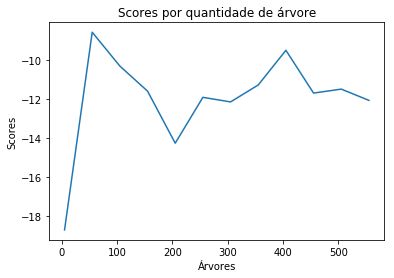

Melhor score: -12.06578527294402
Melhor número de árvore: 555


In [59]:
plotScoreRf(X, y, range(5, 605, 50))